In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins

eval_plugin = "pategan"

In [2]:
# Load dataset
X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(X)

In [4]:
# Generate new samples

syn_model.generate(count = 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038639,0.050680,-0.015938,0.093463,-0.063060,-0.017707,0.001993,0.000767,0.031787,-0.033586,95.097608
1,0.052702,0.050680,0.053611,0.120973,-0.019657,-0.012364,0.098387,0.001731,-0.056091,-0.022986,151.327984
2,-0.031526,0.050680,0.027640,0.070075,-0.041968,-0.058573,0.099858,0.102030,0.045972,0.002713,79.487416
3,-0.019067,-0.044642,0.143256,-0.036849,0.025793,0.066957,0.148824,0.001192,-0.095585,0.044825,218.918727
4,-0.020835,-0.044642,0.054646,0.059498,-0.017923,0.092097,0.086029,0.039668,-0.017502,0.092621,300.187015
5,-0.043851,-0.044642,0.022228,0.027893,-0.042474,-0.016348,0.096744,0.042082,0.067059,0.003952,151.707910
6,-0.042030,-0.044642,0.047670,0.055624,-0.041616,0.017524,0.147519,-0.058860,-0.015057,0.028001,173.097761
7,-0.015693,0.050680,-0.043030,-0.007561,-0.033764,0.032930,-0.008539,0.052234,-0.038217,-0.063685,92.587133
8,0.010976,0.050680,0.010185,0.097405,-0.072899,-0.042014,0.015514,-0.000342,0.019710,0.022005,201.385140
9,0.015682,0.050680,0.118313,0.023809,0.037548,0.064453,0.054567,0.027209,-0.050776,-0.031871,72.213922


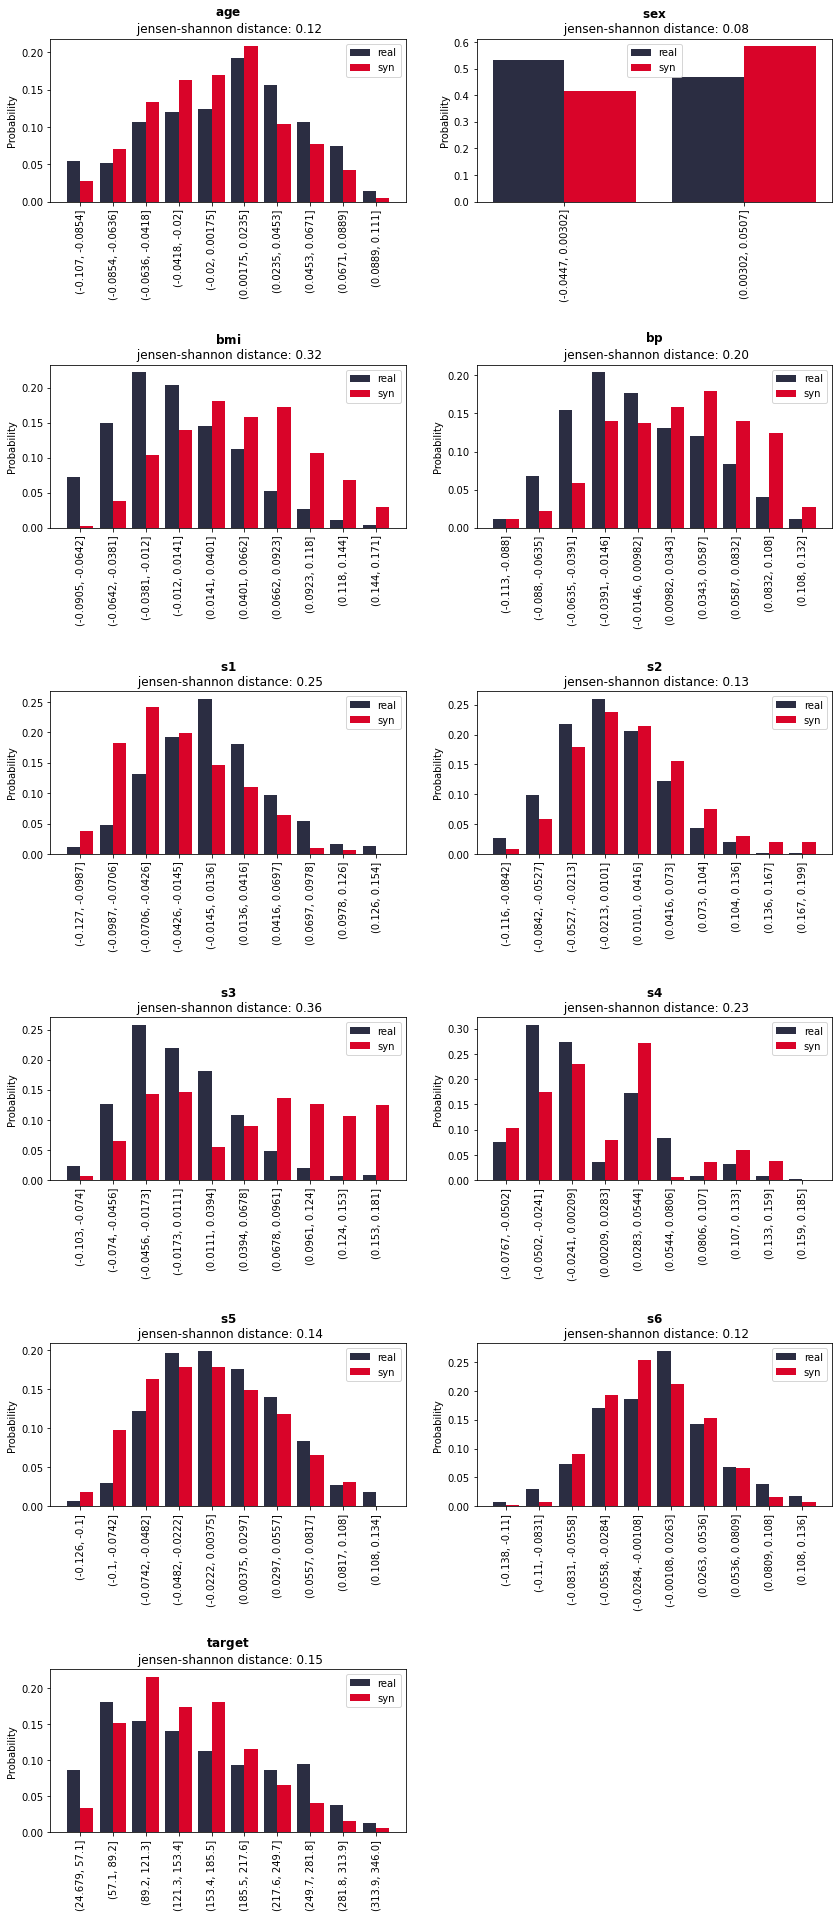

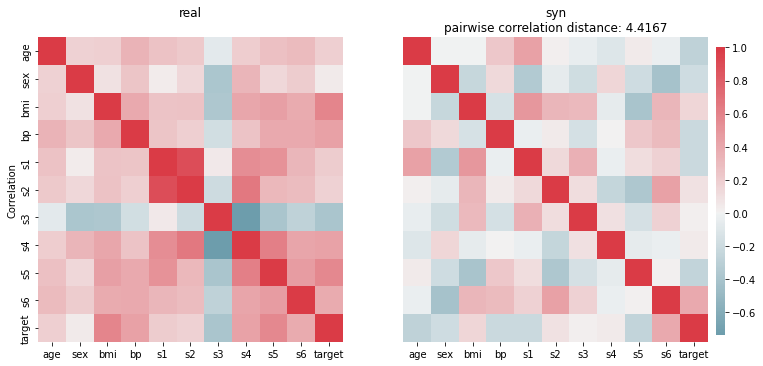

In [5]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

In [6]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [eval_plugin],
    X,
    sensitive_columns = ["sex"],
    repeats = 3,
)

In [7]:
Benchmarks.print(score)


Plugin : pategan


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.00
sanity.common_rows_proportion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,0.01
sanity.nearest_syn_neighbor_distance,0.018181,0.031497,0.025818,0.005609,0.027775,0.006658,3,0,0.01
sanity.inlier_probability,0.970588,0.990950,0.983409,0.009112,0.988688,0.010181,3,0,0.01
sanity.outlier_probability,0.002262,0.006787,0.004525,0.001847,0.004525,0.002262,3,0,0.01
statistical.marginal.jensenshannon_distance,0.163845,0.215378,0.197970,0.024131,0.214686,0.025766,3,0,0.17
statistical.marginal.chi_squared_test,0.144332,0.704067,0.414260,0.228943,0.394380,0.279867,3,0,0.02
statistical.joint.feature_correlation,4.451168,4.795812,4.576750,0.155454,4.483270,0.172322,3,0,0.12
statistical.marginal.inverse_cdf_distance,0.150976,0.207670,0.177827,0.023242,0.174834,0.028347,3,0,3.25
statistical.marginal.inverse_kl_divergence,0.697759,0.834816,0.760685,0.056511,0.749481,0.068528,3,0,0.02
